In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\Salesstore.csv")

In [3]:
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [4]:
df.drop(columns=["Order_ID","Customer_Name","Product_Name","Product_Sub-Category"],inplace=True)

In [5]:
df.shape

(730, 9)

In [6]:
print("DataFrame shape:", df.shape)

DataFrame shape: (730, 9)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Priority     730 non-null    object 
 1   Order_Quantity     730 non-null    int64  
 2   Sales              730 non-null    float64
 3   Ship_Mode          730 non-null    object 
 4   Profit             730 non-null    float64
 5   Region             730 non-null    object 
 6   Customer_Segment   730 non-null    object 
 7   Product_Category   730 non-null    object 
 8   Product_Container  730 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 51.5+ KB


In [8]:
df.describe()

,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000
mean,24.857534,1502.777653,207.479233
std,14.182970,2893.936648,878.631028
min,1.000000,8.600000,-4437.910000
25%,13.000000,171.098375,-77.132500
50%,25.000000,438.700000,0.035000
75%,37.000000,1480.855000,180.000000
max,50.000000,27663.920000,8417.570000


In [9]:
df.corr()

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20356\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order_Quantity,Sales,Profit
Order_Quantity,1.000000,0.204255,0.197149
Sales,0.204255,1.000000,0.595711
Profit,0.197149,0.595711,1.000000


In [10]:
df.head(3)

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,High,21,2781.82,Express Air,-695.26,Nunavut,Corporate,Office Supplies,Large Box
1,High,35,3389.93,Express Air,737.94,Northwest Territories,Consumer,Furniture,Large Box
2,Not Specified,7,2039.56,Express Air,-329.49,Northwest Territories,Corporate,Office Supplies,Large Box


In [11]:
df.to_csv(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\preprocess_data\final.csv', index=False)


In [12]:
print('duplicated :',df.duplicated().sum())
print(" - "*10)
print('null values :',df.isnull().sum().sum())

duplicated : 0
 -  -  -  -  -  -  -  -  -  - 
null values : 0


In [13]:
df.groupby("Product_Category")["Profit"].agg(["max","sum"]).sort_values("sum",ascending=False)

,max,sum
Product_Category,,
Technology,7416.43,81368.05
Office Supplies,8417.57,53073.95
Furniture,3387.35,17017.84


In [14]:
df['Product_Category'].value_counts()

Office Supplies    447
Technology         185
Furniture           98
Name: Product_Category, dtype: int64

In [15]:
pd.set_option('display.max_columns', 100)

In [16]:
pd.set_option('display.max_rows', 100)

In [17]:
valuecounts_col = df.select_dtypes(include=['object']).columns

for value in valuecounts_col:
    a = df[value].value_counts()
    print('Column name:', value)
    print(' ' * 15)
    print(a)
    print(' - ' * 15)

Column name: Order_Priority
               
Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: Order_Priority, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Ship_Mode
               
Regular Air    579
Express Air    151
Name: Ship_Mode, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Region
               
West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: Region, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Customer_Segment
               
Corporate         518
Consumer          153
Home Office        31
Small Business     28
Name: Customer_Segment, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Product_Category
               
Office Supplies    447
Technology         185
Furniture           98
Na

In [18]:
# label_encoder = LabelEncoder()
# for column in df.select_dtypes(include=['object']).columns:
#     df[column] = label_encoder.fit_transform(df[column])

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

mappings = {
    'Order_Priority': {'Not Specified': 0, 'High': 1, 'Low': 2, 'Critical': 3, 'Medium': 4},
    'Ship_Mode': {'Regular Air': 0, 'Express Air': 1},
    'Region': {'West': 0, 'Atlantic': 1, 'Northwest Territories': 2, 'Prarie': 3, 'Ontario': 4, 'Nunavut': 5},
    'Customer_Segment': {'Corporate': 0, 'Consumer': 1, 'Home Office': 2, 'Small Business': 3},
    'Product_Category': {'Office Supplies': 0, 'Technology': 1, 'Furniture': 2},
    'Product_Container': {'Small Box': 0, 'Large Box': 1, 'Medium Box': 2}
}

# Apply the mappings to each column
for col in categorical_cols:
    df[col] = df[col].map(mappings[col])

In [20]:
df.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,1,21,2781.82,1,-695.26,5,0,0,1
1,1,35,3389.93,1,737.94,2,1,2,1
2,0,7,2039.56,1,-329.49,2,0,0,1
3,2,6,905.94,1,-4.19,2,2,2,1
4,4,24,1168.15,1,-743.96,2,3,0,1


In [33]:
df.to_csv(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\preprocess_data\after_labels.csv', index=False)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Priority     730 non-null    int64  
 1   Order_Quantity     730 non-null    int64  
 2   Sales              730 non-null    float64
 3   Ship_Mode          730 non-null    int64  
 4   Profit             730 non-null    float64
 5   Region             730 non-null    int64  
 6   Customer_Segment   730 non-null    int64  
 7   Product_Category   730 non-null    int64  
 8   Product_Container  730 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.5 KB


In [21]:
# df['Order_Priority'].astype(float)

#### Check for Outliers: If your data contains outliers, Robust scaling might be a good choice.
#### Algorithm Requirements: If you are using algorithms that assume normally distributed data (e.g., linear regression), Standard scaling is often preferred.
#### Feature Range: If your algorithm requires bounded input (e.g., neural networks), Min-Max scaling is appropriate.

<Figure size 1200x600 with 0 Axes>

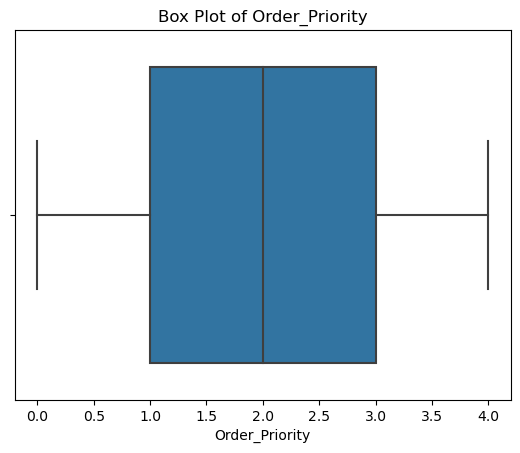

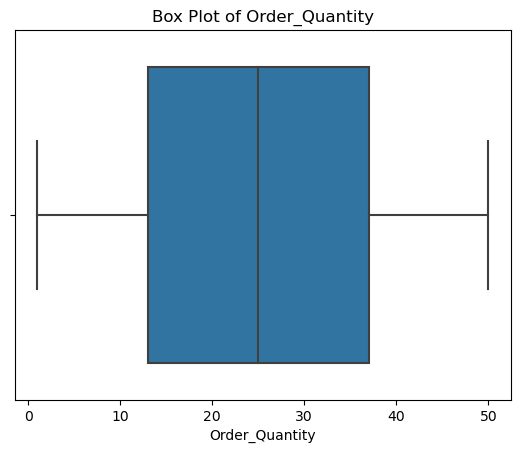

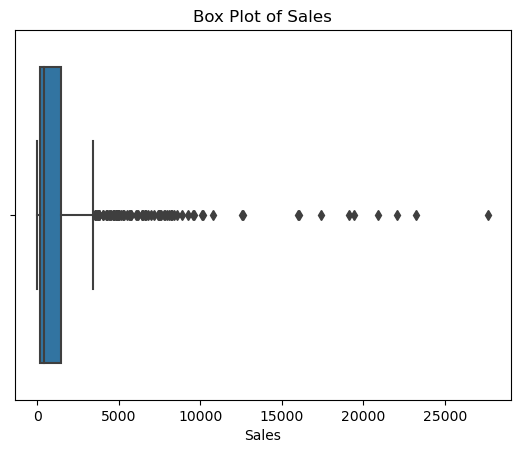

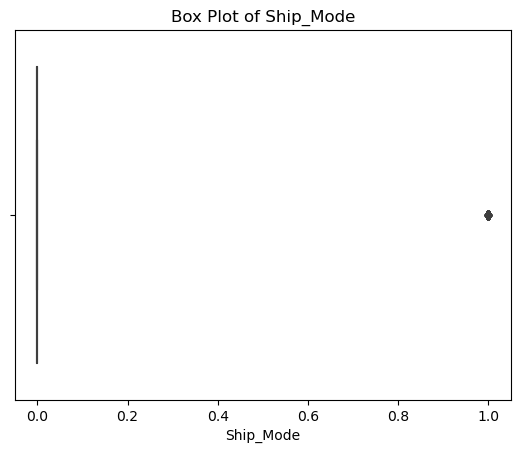

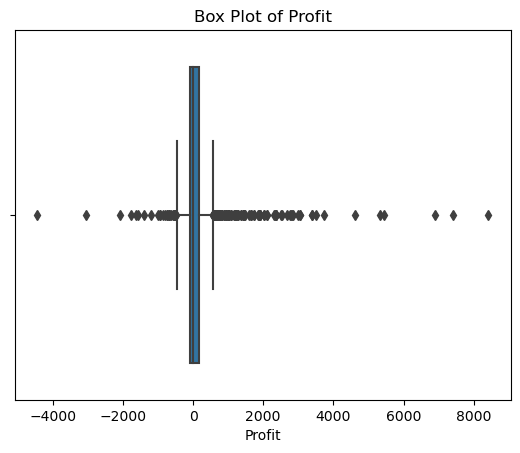

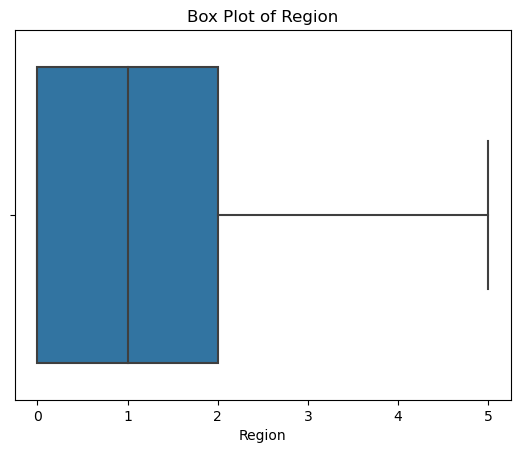

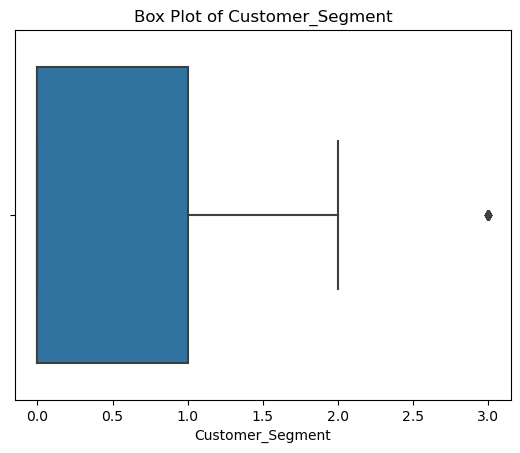

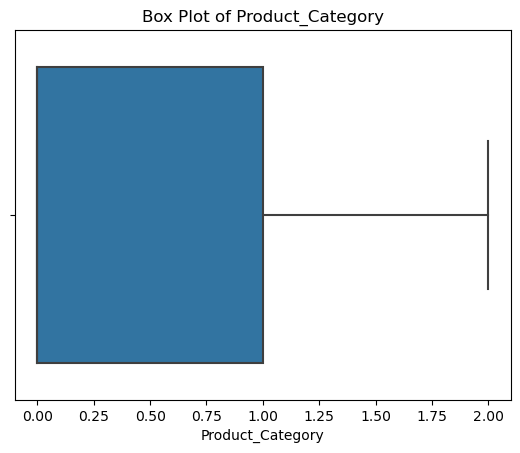

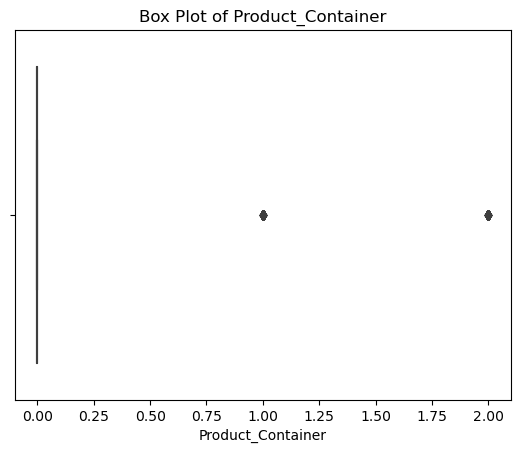

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 6))

for col in num_col:
    plt.figure()  
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [23]:
df.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,1,21,2781.82,1,-695.26,5,0,0,1
1,1,35,3389.93,1,737.94,2,1,2,1
2,0,7,2039.56,1,-329.49,2,0,0,1
3,2,6,905.94,1,-4.19,2,2,2,1
4,4,24,1168.15,1,-743.96,2,3,0,1


In [24]:
df.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Region', 'Customer_Segment', 'Product_Category', 'Product_Container'],
      dtype='object')

In [25]:
# from sklearn.preprocessing import RobustScaler
# numerical_cols = ['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 
#        'Region', 'Customer_Segment', 'Product_Category', 'Product_Container']

# # Apply RobustScaler to the selected numerical columns
# robust_scaler = RobustScaler()
# df[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])

In [26]:
from sklearn.preprocessing import RobustScaler,StandardScaler

robust_scaler = RobustScaler() 
df['Sales'] = robust_scaler.fit_transform(df[['Sales']])
# df['Order_Quantity'] = robust_scaler.fit_transform(df[['Order_Quantity']])


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Profit')
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (657, 8)
X_test shape: (73, 8)
y_train shape: (657,)
y_test shape: (73,)


In [28]:
X_train.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Region,Customer_Segment,Product_Category,Product_Container
97,1,47,0.474409,0,2,0,1,2
568,3,16,-0.279915,0,0,0,0,0
409,0,2,0.267462,0,2,0,0,0
23,4,34,1.793723,0,1,1,0,1
223,0,39,0.535641,1,3,0,2,0


In [37]:
df.duplicated().sum()

0

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, mean_squared_error
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss=mean_squared_error,
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10


17/17 [==============================] - 2s 23ms/step - loss: 948867.1250 - accuracy: 0.0000e+00 - val_loss: 528235.0625 - val_accuracy: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 948866.9375 - accuracy: 0.0000e+00 - val_loss: 528234.9375 - val_accuracy: 0.0000e+00
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 948866.6250 - accuracy: 0.0000e+00 - val_loss: 528234.8125 - val_accuracy: 0.0000e+00
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 948866.5625 - accuracy: 0.0000e+00 - val_loss: 528234.6250 - val_accuracy: 0.0000e+00
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 948866.5000 - accuracy: 0.0000e+00 - val_loss: 528234.5625 - val_accuracy: 0.0000e+00
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 948866.4375 - accuracy: 0.0000e+00 - val_loss: 528234.5000 - val_accuracy: 0.0000e+00
Epoch 7/10
17/17 [==============================]

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split

def create_model(trial):
    # Define the architecture and hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 3)
    units = trial.suggest_int('units', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    l2_reg = trial.suggest_float('l2_reg', 1e-4, 1e-2)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2)

    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))

    for i in range(n_layers):
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_reg)))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss=MeanSquaredError(),
                  metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)

    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=0)

    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]  # Return accuracy as the objective

# Split data into training and testing sets if not already done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best hyperparameters
print(f'Best trial: {study.best_trial.params}')

# Test the best model
best_model = create_model(study.best_trial)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def visualize_model(model):
#     G = nx.DiGraph()
#     for i, layer in enumerate(model.layers):
#         layer_name = f"{layer.__class__.__name__}\n({layer.output_shape})"
#         G.add_node(i, label=layer_name)
#         if i > 0:
#             G.add_edge(i-1, i)
    
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(12, 8))
#     nx.draw(G, pos, with_labels=False, node_size=4000, node_color='skyblue', node_shape='o', alpha=0.9, linewidths=40)
    
#     labels = nx.get_node_attributes(G, 'label')
#     nx.draw_networkx_labels(G, pos, labels, font_size=10)
    
#     plt.title("Model Architecture", size=15)
#     plt.show()

# visualize_model(model)

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1152      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 10058 (39.29 KB)
Trainable params: 10058 (39.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
